![image](../imgs/databites_header.png)

# Introduction to Time Series - A simple decomposition
**A Hands-On Guide Using Python**

Welcome to this hands-on Jupyter Notebook on Time Series Analysis, brought to you by [databites.tech](https://www.databites.tech/). In this notebook, we’ll walk through the fundamentals of time series decomposition using Python.

You’ll learn how to:

- Understand the key components of time series data
- Access and load time series data from Kaggle¡
- Visualize and decompose a time series into its trend, seasonality, and residual components

This notebook is ideal for beginners in data science or analysts wanting to enhance their time series skills using real-world datasets.

# Preparing the Environment and Loading the Data
Before diving into analysis, we need to set up our Python environment. This includes installing necessary libraries and ensuring access to Kaggle to download our dataset.

In the next cells:
- We'll install and import key libraries (pandas, matplotlib, statsmodels, etc.)
- We'll configure access to the Kaggle API using credentials stored in a kaggle.json file

This ensures a smooth and reproducible workflow for loading external datasets directly into our notebook.

## Installing and importing the required libraries

In [1]:
!pip install numpy pandas matplotlib seaborn kaggle statsmodels python-dateutil


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import zipfile
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import os
import json


## Step 2: Locate Your kaggle.json File
Ensure your kaggle.json file is in a secure location on your system (e.g., ../.keys/kaggle.json). 
This file contains your Kaggle username and API key for authentication.

## Step 3: Set Up Your kaggle.json File
Use Python to set up your Kaggle credentials for the API.
- Read the kaggle.json file from its current location.
- Copy it to the default location where the Kaggle API expects it: ~/.kaggle/kaggle.json.
- Set appropriate permissions for security.

In [3]:


# Path to your kaggle.json file
kaggle_json_path = "../.keys/kaggle.json"  # Adjust if your file is in a different folder

# Read the kaggle.json file
with open(kaggle_json_path, "r") as f:
    kaggle_creds = json.load(f)

# Ensure the ~/.kaggle directory exists
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Write the credentials to the default location
kaggle_target_path = os.path.expanduser("~/.kaggle/kaggle.json")
with open(kaggle_target_path, "w") as f:
    json.dump(kaggle_creds, f)

# Set permissions to secure the file
os.chmod(kaggle_target_path, 0o600)

## Step 4: Download the Dataset
Use the Kaggle API to download the dataset to your working directory:

In [4]:
!kaggle datasets download -d kursatdinc/airline-passangers

Dataset URL: https://www.kaggle.com/datasets/kursatdinc/airline-passangers
License(s): apache-2.0
airline-passangers.zip: Skipping, found more recently modified local copy (use --force to force download)


## Step 5: Extract the Dataset
Unzip the downloaded file into a new folder for easier access:

In [5]:


# Define the ZIP file and the extraction folder
dataset_zip = "airline-passangers.zip"
extracted_folder = "data"

# Create the folder if it doesn't exist
os.makedirs(extracted_folder, exist_ok=True)

# Extract the dataset
with zipfile.ZipFile(dataset_zip, "r") as zip_ref:
    zip_ref.extractall(extracted_folder)

print(f"Dataset downloaded and extracted to: {extracted_folder}")

Dataset downloaded and extracted to: data


## Step 6: Load the Dataset
Now that the dataset is extracted, you can load the files into a pandas DataFrame for analysis. For example:

In [11]:
import pandas as pd

# Adjust the filename if necessary
data_file = "data/airline-passengers.csv"

# We convert the table into a pandas DataFrame
df = pd.read_csv(data_file)

# We change the name to make it easier to understand
df = df.rename(columns={"month":"date", "total_passengers": "passengers"})

# We make sure the date column is a datetime columns
df['date'] = pd.to_datetime(df['date'])

df.head()

,date,passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


# Visualizing the Time Series
Once the data is loaded, the next step is to visualize it.
A time series plot is a powerful way to observe trends, seasonality, and any irregular behavior over time. This will guide us in selecting the appropriate decomposition technique.

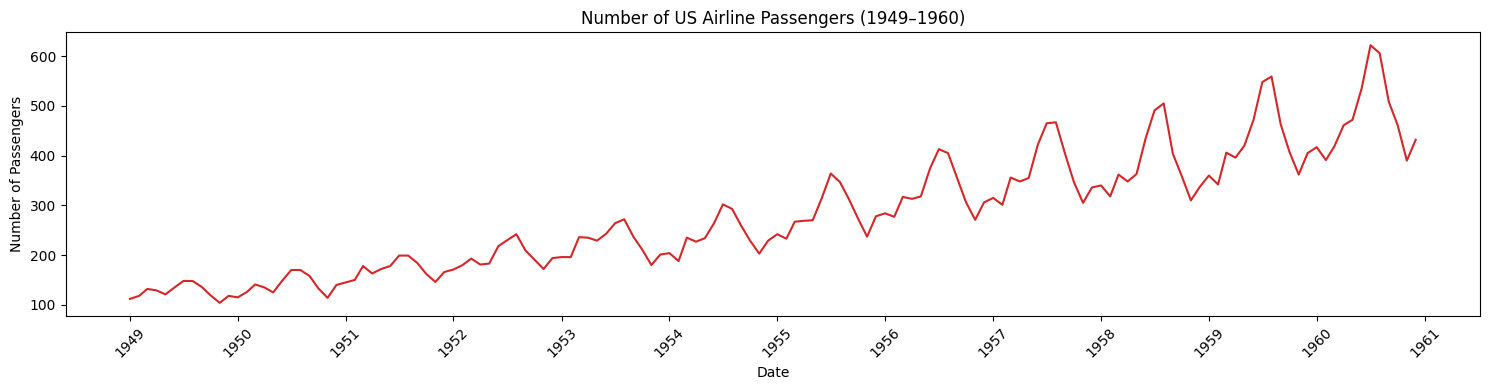

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15, 4), dpi=dpi)
    plt.plot(x, y, color='tab:red')

    # Format the x-axis to show one tick per year
    ax = plt.gca()
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.xaxis.set_major_locator(mdates.YearLocator())         # One tick per year
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Format as 4-digit year
    plt.xticks(rotation=45)                                  # Rotate labels for clarity
    plt.tight_layout()
    plt.show()

# Plotting with updated function
plot_df(df, x=df['date'], y=df['passengers'], title='Number of US Airline Passengers (1949–1960)')


**Understanding Time Series Components**
A time series can often be decomposed into four main components:

- Base Level + Trend + Seasonality + Error

These elements help describe and interpret the structure of the series:
- **Trend:** Long-term progression (increasing, decreasing, or stable)
- **Seasonality:** Repeating patterns at regular intervals, typically driven by time-related factors (month, week, hour)
- **Cyclic Behavior:** Recurrent patterns without a fixed frequency (e.g., economic cycles)
- **Eror:** Irregular, random noise not explained by other components

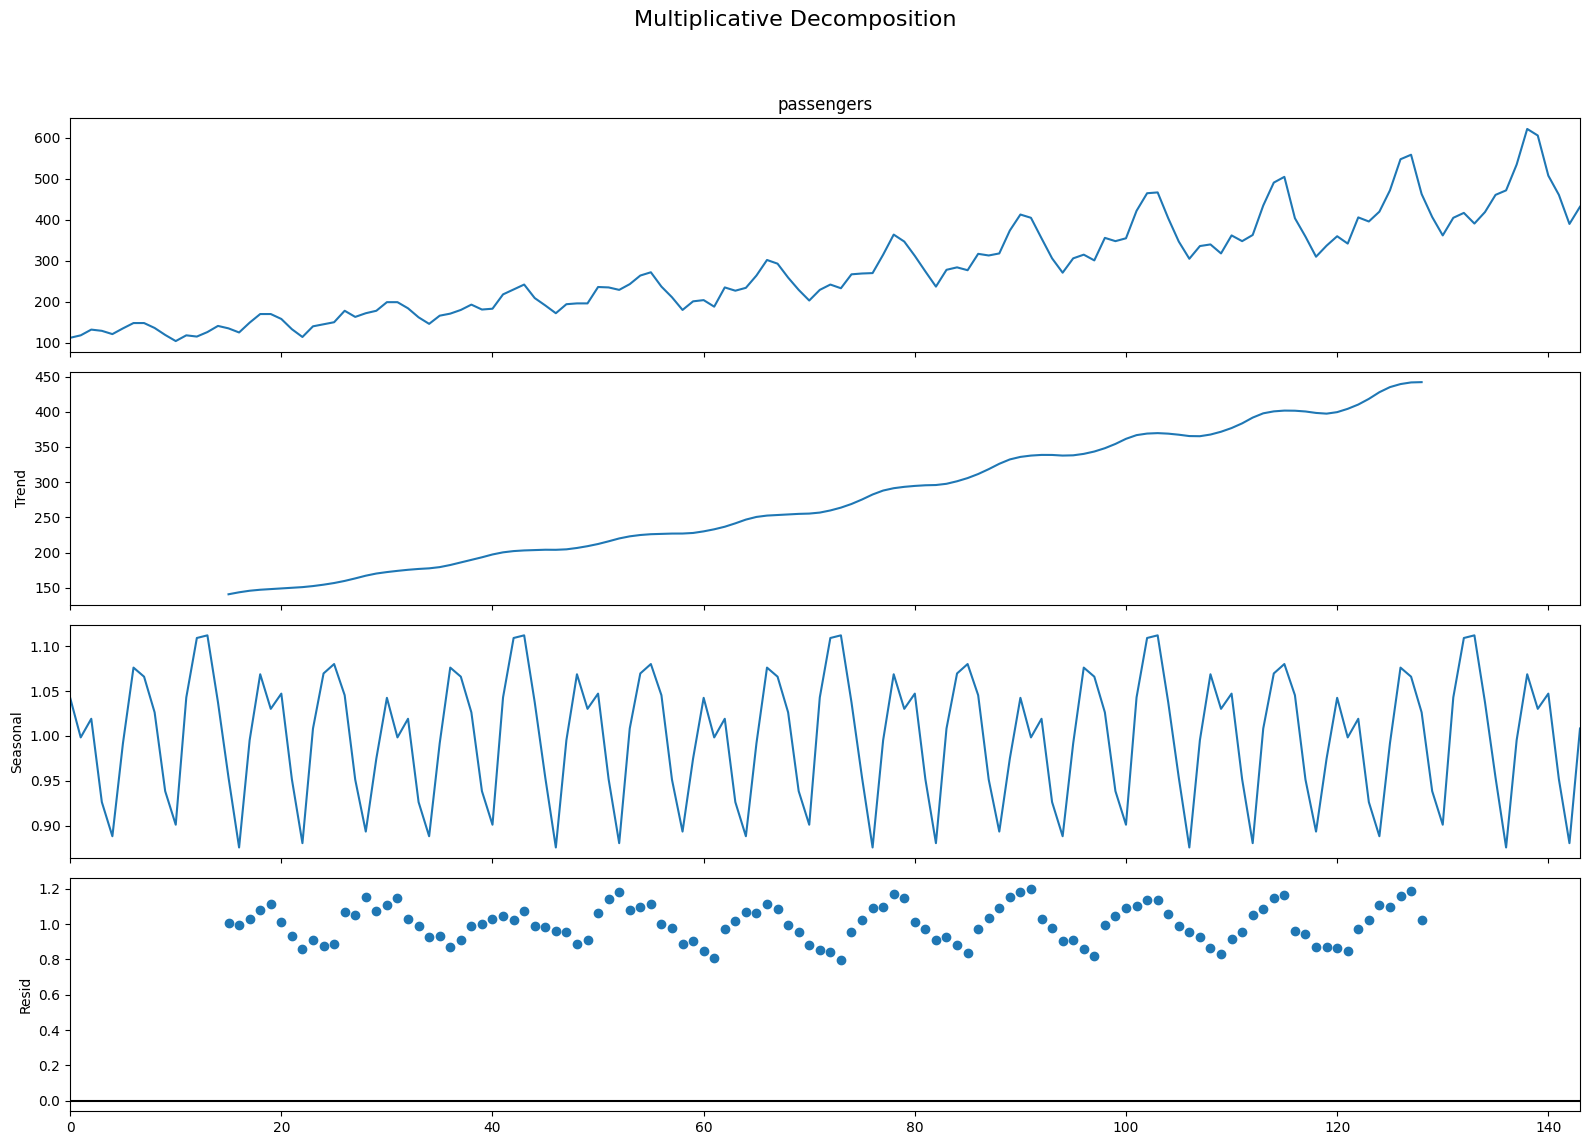

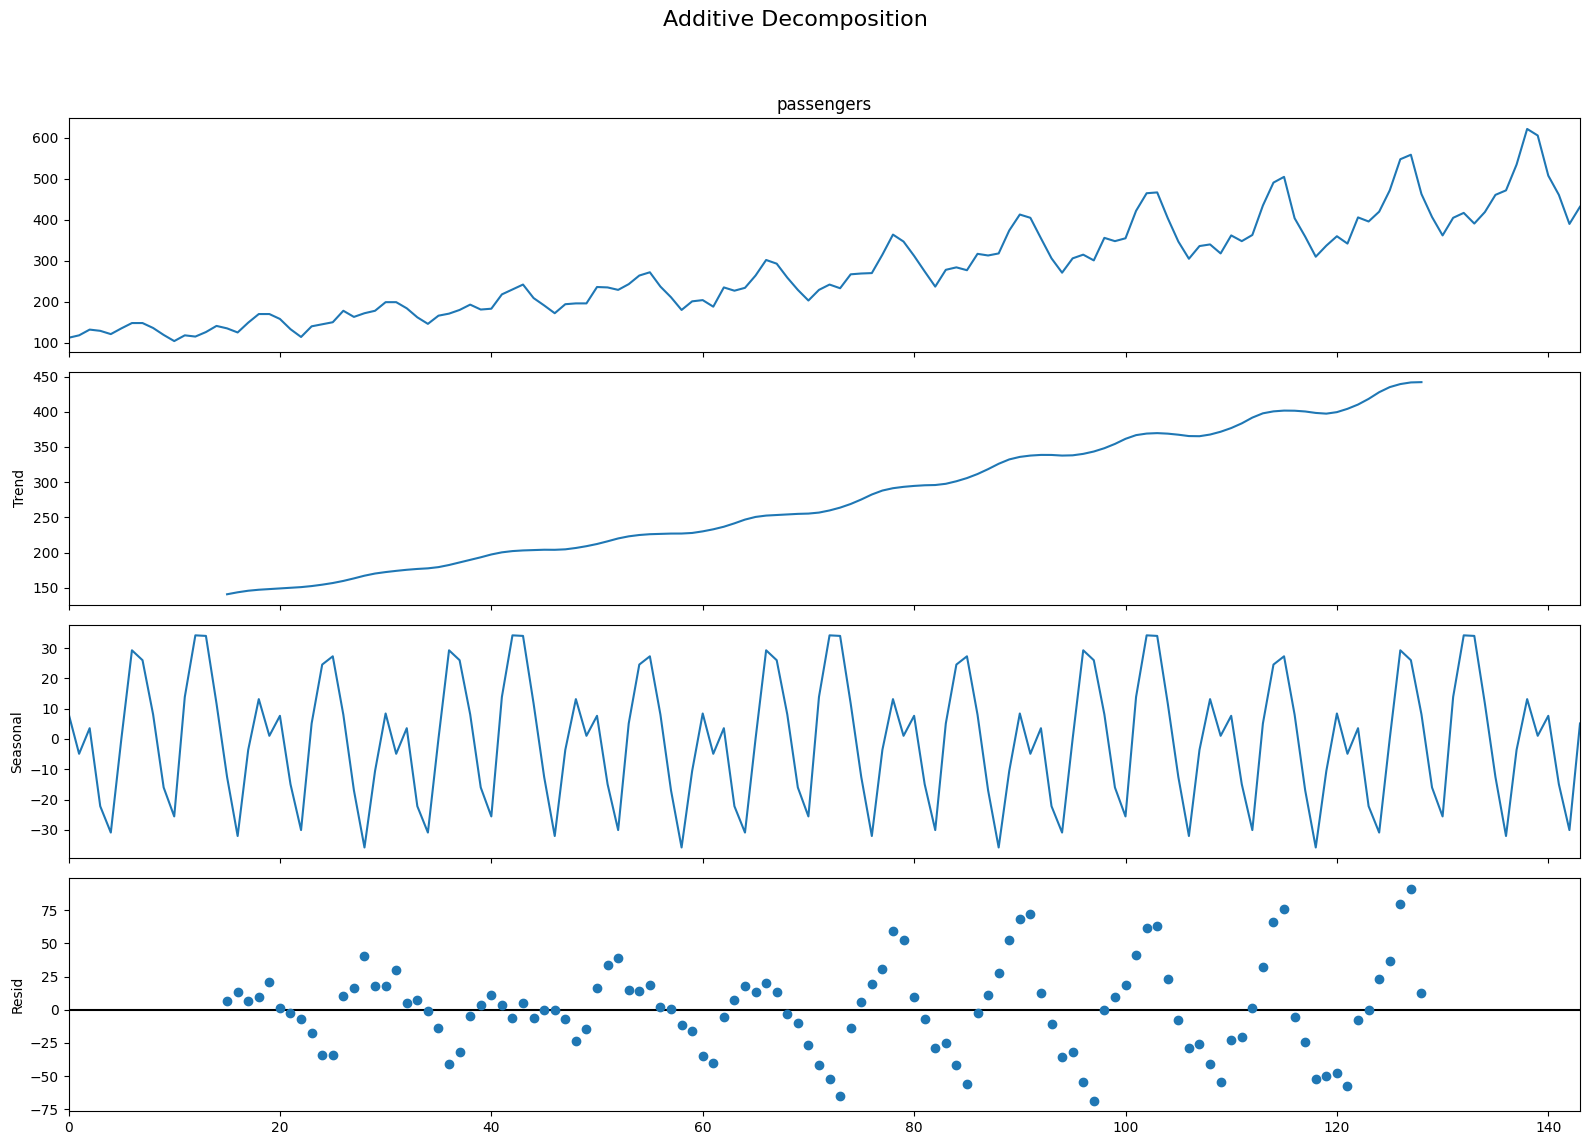

In [8]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

When comparing additive and multiplicative decomposition:

- The residuals from the additive model still show some pattern, indicating it might not fully capture the dynamics of the series.
- In contrast, multiplicative decomposition yields more random-looking residuals, which suggests a better fit for this dataset.

Conclusion: For this particular time series, the multiplicative model more accurately separates the signal from noise. Always inspect residuals to evaluate model effectiveness.